# **Task 4**

Develop a simple image classification model using machine learning to classify images into categories (e.g., animals, vehicles, buildings).

Steps
1. Collect and label a dataset of images.
2. Preprocess the images (e.g., resize, normalize).
3. Train a machine learning model (e.g., convolutional neural network) on the dataset.
4. Evaluate the model's performance using metrics like accuracy.

In [1]:
pip install tensorflow pandas numpy matplotlib scikit-learn


In [7]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


In [8]:
IMG_SIZE = 128


In [12]:
def load_data(images_folder, labels_csv, label_value):

    df = pd.read_csv(labels_csv)

    images = []
    labels = []

    for idx, row in df.iterrows():
        img_path = os.path.join(images_folder, row['image_name'])
        # Load image
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img_to_array(img)
        img = img / 255.0  # normalize

        images.append(img)
        labels.append(label_value)

    return images, labels


In [13]:
import pandas as pd

df = pd.read_csv('/content/cats.csv')
print(df.columns)       # Print all column names
print(df.head())        # Print first few rows


Index(['label_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height',
       'image_name', 'image_width', 'image_height'],
      dtype='object')
  label_name  bbox_x  bbox_y  bbox_width  bbox_height image_name  image_width  \
0        cat     123      38         228          209      0.jpg          500   
1        cat      50      32         250          248      1.jpg          300   
2        cat       1      44         462          454     10.jpg          489   
3        cat      53      16         331          318    100.jpg          403   
4        cat     151       4         140          193    101.jpg          297   

   image_height  
0           375  
1           281  
2           500  
3           500  
4           200  


In [14]:
cat_images, cat_labels = load_data('/content/cats', '/content/cats.csv', 0)
dog_images, dog_labels = load_data('/content/dogs', '/content/dogs.csv', 1)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit generator to training data (if needed, usually for featurewise centering/scaling)
datagen.fit(X_train)

# Train using augmented data generator
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5124 - loss: 0.9711 - val_accuracy: 0.6812 - val_loss: 0.5616
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 849ms/step - accuracy: 0.6045 - loss: 0.6548 - val_accuracy: 0.5797 - val_loss: 0.6575
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 989ms/step - accuracy: 0.6264 - loss: 0.6392 - val_accuracy: 0.6087 - val_loss: 0.6268
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6150 - loss: 0.6595 - val_accuracy: 0.6522 - val_loss: 0.6284
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 830ms/step - accuracy: 0.6261 - loss: 0.6420 - val_accuracy: 0.6377 - val_loss: 0.5966
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6658 - loss: 0.6180 - val_accuracy: 0.6957 - val_loss: 0.5911
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6871 - loss: 0.5943 - val_accuracy: 0.7101 - val_loss: 0.5793
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 816ms/step - accuracy: 0.7195 - loss: 0.5680 - val_accuracy: 0.6377 - val_loss: 0.6240
Epoc

In [20]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.7039 - loss: 0.5795
Validation Accuracy: 68.12%


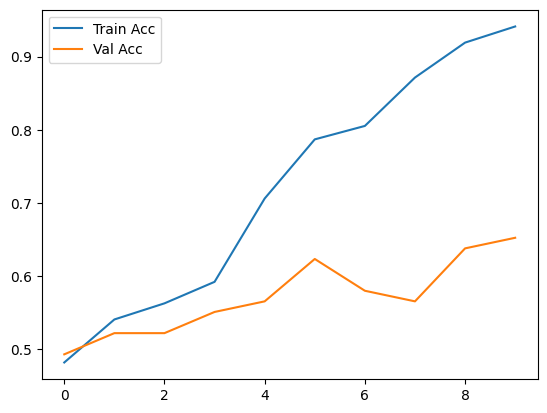

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


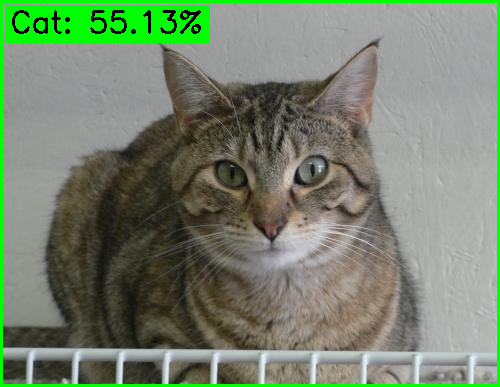

Saved to /content/output_boxed_image.jpg


('Cat', np.float32(0.5513294))

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def predict_and_draw_box(model, image_path, img_size=128, save_path=None):
    # Load and preprocess image for model
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict class
    prediction = model.predict(img_array_expanded)
    label = "Dog" if prediction[0][0] > 0.5 else "Cat"
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

    # Load original image with OpenCV
    img_cv = cv2.imread(image_path)
    if img_cv is None:
        print("Error: Could not read image.")
        return

    # Draw bounding box and label
    height, width, _ = img_cv.shape
    box_color = (0, 255, 0)
    thickness = 3
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2

    cv2.rectangle(img_cv, (0, 0), (width - 1, height - 1), box_color, thickness)
    text = f"{label}: {confidence*100:.2f}%"
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_x, text_y = 10, text_size[1] + 10
    cv2.rectangle(img_cv, (5, 5), (5 + text_size[0] + 10, 5 + text_size[1] + 15), box_color, -1)
    cv2.putText(img_cv, text, (text_x, text_y), font, font_scale, (0, 0, 0), font_thickness)

    # Show in Colab
    cv2_imshow(img_cv)

    # Save to file if needed
    if save_path:
        cv2.imwrite(save_path, img_cv)
        print(f"Saved to {save_path}")

    return label, confidence
predict_and_draw_box(model, "/content/cats/103.jpg", img_size=128, save_path="/content/output_boxed_image.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


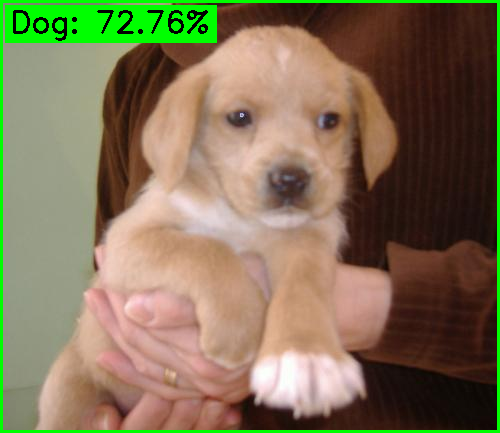

Saved to /content/output_boxed_image.jpg


('Dog', np.float32(0.72761095))

In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def predict_and_draw_box(model, image_path, img_size=128, save_path=None):
    # Load and preprocess image for model
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict class
    prediction = model.predict(img_array_expanded)
    label = "Dog" if prediction[0][0] > 0.5 else "Cat"
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

    # Load original image with OpenCV
    img_cv = cv2.imread(image_path)
    if img_cv is None:
        print("Error: Could not read image.")
        return

    # Draw bounding box and label
    height, width, _ = img_cv.shape
    box_color = (0, 255, 0)
    thickness = 3
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2

    cv2.rectangle(img_cv, (0, 0), (width - 1, height - 1), box_color, thickness)
    text = f"{label}: {confidence*100:.2f}%"
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_x, text_y = 10, text_size[1] + 10
    cv2.rectangle(img_cv, (5, 5), (5 + text_size[0] + 10, 5 + text_size[1] + 15), box_color, -1)
    cv2.putText(img_cv, text, (text_x, text_y), font, font_scale, (0, 0, 0), font_thickness)

    # Show in Colab
    cv2_imshow(img_cv)

    # Save to file if needed
    if save_path:
        cv2.imwrite(save_path, img_cv)
        print(f"Saved to {save_path}")

    return label, confidence
predict_and_draw_box(model, "/content/dogs/103.jpg", img_size=128, save_path="/content/output_boxed_image.jpg")
